## 387. First Unique Character in a String
<div class="alert alert-block alert-success">
Given a string, find the first non-repeating character in it and return it's index. If it doesn't exist, return -1.

Examples:

s = "leetcode"
return 0.
</div>
You should first ask your interviewer if the string is an ASCII string or a Unicode string. We'll assume for simplicity the character set is ASCII. If this assumption is not valid, we would need to increase the storage size.

**Approach 1**: Linear time solution
The idea is to go through the string and save in a hash map the number of times each character appears in the string. That would take O(N) time. Then we go through the string the second time, this time we use the hash map as a reference to check if a character is unique or not.
If the character is unique, one could just return its index. 

In [ ]:
import collections
def firstUniqChar(s):
    # build freq map
    cnt = collections.Counter(s)
    for i in range(len(s)):
        if cnt[s[i]] == 1:
            return i
    return -1

def firstUniqChar1(s):
    cnt = [0]*26
    for c in s:
        cnt[ord(c)-ord('a')] +=1
    for i,c in enumerate(s):
        if cnt[ord(c)-ord('a')] == 1:
            return i
print(firstUniqChar1("leetcode"))

## 442. Find All Duplicates in an Array
<div class="alert alert-block alert-success">
Given an array of integers, 1 ≤ a[i] ≤ n (n = size of array), some elements appear twice and others appear once.

Find all the elements that appear twice in this array.

Could you do it without extra space and in O(n) runtime?


Input:

[4,3,2,7,8,2,3,1]

Output:
[2,3]
</div>
The idea is we do a linear pass using the input array itself as a hash to store which numbers have been seen before. We do this by making elements at certain indexes negative. Because the values in the array are between 1 and n, when you reference nums[abs(x)-1] you are guaranteed to have a valid index from the value (x). Essentially the same number will reference the same index every time, so the first time you get to a value/index you set it the number at that index negative. The second time you get to a value/index, that index will have a number that is negative so you know that you have seen that value/index before

In [ ]:
def findDuplicates(nums): 
    res = []
    for x in nums:
        if nums[abs(x)-1]<0:
            res.append(abs(x))
        else:
            nums[abs(x)-1] *=-1
    return res


def findDuplicates_hash(nums):
    n = len(nums)+1
    for i in range(len(nums)):
        nums[nums[i]%n-1] +=n 
    return [ i+1 for i in range(len(nums)) if nums[i]//n==2]

print(findDuplicates([4,3,2,7,8,2,3,1]))

## 54. Spiral Matrix
<div class="alert alert-block alert-success">
Given a matrix of m x n elements (m rows, n columns), return all elements of the matrix in spiral order.

Example 1:

Input: <br>
[<br>
 [ 1, 2, 3 ],<br>
 [ 4, 5, 6 ],<br>
 [ 7, 8, 9 ]<br>
]<br>
Output: [1,2,3,6,9,8,7,4,5]
</div>
**Approach 1**: Simulation
Draw the path that the spiral makes. We know that the path should turn clockwise whenever it would go out of bounds or into a cell that was previously visited.

Let the array have R rows and C columns, seen[r][c] denotes that the cell on the r-th row and c-th column was previously visited. Our current position is (r, c), facing direction di, and we want to visit R x C total cells.

As we move through the matrix, our candidate next position is (cr, cc). If the candidate is in the bounds of the matrix and unseen, then it becomes our next position; otherwise, our next position is the one after performing a clockwise turn.

In [ ]:
def spiralOrder(matrix):
    if not matrix: return []
    nrows,ncols = len(matrix), len(matrix[0])
    seen = [[False]*ncols for _ in matrix]
    ans = []
    dr,dc = [0,1,0,-1],[1,0,-1,0] ## Tricky here order matter
    r = c = di = 0
    for _ in range(nrows*ncols):
        ans.append(matrix[r][c])
        seen[r][c] = True
        cr,cc = r + dr[di], c + dc[di]
        if 0 <= cr < nrows and 0 <= cc < ncols and not seen[cr][cc]:
            r,c = cr,cc
        else:
            di = (di+1)%4
            r,c = r +dr[di], c + dc[di]
    return ans

print(spiralOrder([[1,2,3],[4,5,6],[7,8,9]]))

## 36. Valid Sudoku
<div class="alert alert-block alert-success">
Determine if a 9x9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

1. Each row must contain the digits 1-9 without repetition.
1. Each column must contain the digits 1-9 without repetition.
1. Each of the 9 3x3 sub-boxes of the grid must contain the digits 1-9 without repetition.
</div>


In [ ]:
def isValidSudoku(board):
    row = [{} for _ in range(9)]
    col = [{} for _ in range(9)]
    cell = [[{} for _ in range(3)] for _ in range(3)]
    for i in range(9):
        for j in range(9):
            c = board[i][j] 
            if c != '.':
                if c in row[i]: return False
                else: row[i][c] = [i,j]

                if c in col[j]: return False
                else: col[j][c] = [i,j]

                if c in cell[i//3][j//3]: return False
                else: cell[i//3][j//3][c] = [i,j]
    return True


def isValidSudoku_V3(board):
    seen = set()
    for i in range(0,9):
        for j in range(0,9):
            if board[i][j]!='.':
                c = board[i][j]
                if (i,c) in seen or (c,j) in seen or (i//3,j//3,c) in seen:
                    return False
                seen.add((i,c))
                seen.add((c,j))
                seen.add((i//3,j//3,c))
    return True
    
    
def isValidSudoku_V2(board):
    seen = sum(([(c, i), (j, c), (i//3, j//3, c)]
            for i in range(9) for j in range(9)
            for c in [board[i][j]] if c != '.'), [])

    return len(seen) == len(set(seen))

## 151. Reverse Words in a String
<div class="alert alert-block alert-success">
Given an input string, reverse the string word by word.

Input: "the sky is blue",
Output: "blue is sky the".
</div>

In [ ]:
def reverseWords(s):
    res = ""
    j = len(s)
    # iterate in reverse order
    for i in range(len(s)-1,-1,-1):
        # trim the tailing space
        if s[i] == " ":
            j = i
        # if we encountered a " " before the words, it means the word end here
        elif i == 0 or s[i-1] == " ":
            if len(res):
                res += " "
            res += s[i:j]
    return res

def reverseWords_V2(s):
    return ''.join()

## 917. Reverse Only Letters
Given a string S, return the "reversed" string where all characters that are not a letter stay in the same place, and all letters reverse their positions.

Input: "ab-cd"
Output: "dc-ba"
Example 2:

Input: "a-bC-dEf-ghIj"
Output: "j-Ih-gfE-dCba"

In [ ]:
def reverseOnlyLetters(S):
    s = list(S)
    left,right = 0,len(S)-1
    while left < right:
        while left < right and not s[left].isalpha():
            left +=1
        while left < right and not s[right].isalpha():
            right -=1
        s[left],s[right] = s[right],s[left]
        left,right = left +1, right -1

    return ''.join(s)

print(reverseOnlyLetters("a-bC-dEf-ghIj"))

## 84. Largest Rectangle in Histogram
<div class="alert alert-block alert-success">
Given n non-negative integers representing the histogram's bar height where the width of each bar is 1, find the area of largest rectangle in the histogram.
![histogram.png](attachment:histogram.png)
Above is a histogram where width of each bar is 1, given height = [2,1,5,6,2,3].
![histogram_area.png](attachment:histogram_area.png)

</div>
**Approach 1** O(n^2) time. Consider all bars as starting points and calculate area of all rectangles starting with every bar. Finally return maximum of all possible areas

**Approach 2** Divide and conquere to solve in O(nlogn) time.

1. The simple idea, for a given range of bars, the maximum area can either from left or right half of the bars, or from the area containing the middle two bars. For the last condition, expanding from the middle two bars to find a maximum area is O(n), which makes a typical Divide and Conquer solution with T(n) = 2T(n/2) + O(n). Thus the overall complexity is O(nlgn) for time and O(1) for space (or O(lgn) considering stack usage).

1. The other idea is to find the minimum value in the given array. Once we have index of the minimum value, the max area is maximum of following three values.
a) Maximum area in left side of minimum value (Not including the min value)
b) Maximum area in right side of minimum value (Not including the min value)
c) Number of bars multiplied by minimum value.
The areas in left and right of minimum value bar can be calculated recursively. If we use linear search to find the minimum value, then the worst case time complexity of this algorithm becomes O(n^2). In worst case, we always have (n-1) elements in one side and 0 elements in other side and if the finding minimum takes O(n) time, we get the recurrence similar to worst case of Quick Sort.

**Range minimum query (RMQ)** solves the problem of finding the minimal value in a sub-array of an array of comparable objects
1. A simple solution is to run a loop from qs to qe and find minimum element in given range. This solution takes O(n) time in worst case.

1. Another solution is to create a 2D array where an entry [i, j] stores the minimum value in range arr[i..j]. Minimum of a given range can now be calculated in O(1) time, but preprocessing takes O(n^2) time. Also, this approach needs O(n^2) extra space which may become huge for large input arrays.

1. Segment tree can be used to do preprocessing and query in moderate time. With segment tree, preprocessing time is O(n) and time to for range minimum query is O(Logn). The extra space required is O(n) to store the segment tree.

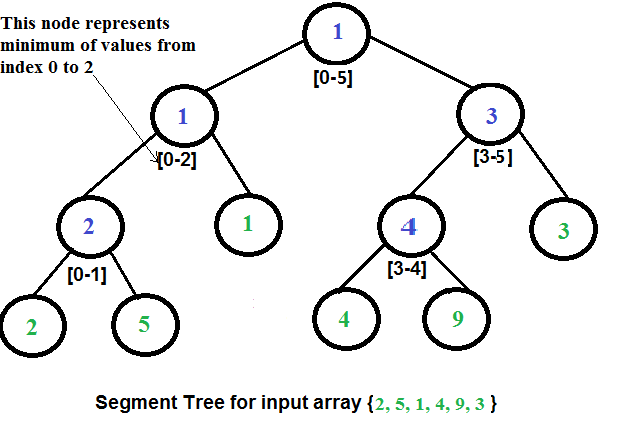

**Aproach 3** O(n) time using stack
For every bar ‘x’, we calculate the area with ‘x’ as the smallest bar in the rectangle. If we calculate such area for every bar ‘x’ and find the maximum of all areas, our task is done. How to calculate area with ‘x’ as smallest bar? We need to know index of the first smaller (smaller than ‘x’) bar on left of ‘x’ and index of first smaller bar on right of ‘x’. Let us call these indexes as ‘left index’ and ‘right index’ respectively.

We traverse all bars from left to right, maintain a stack of bars. Every bar is pushed to stack once. A bar is popped from stack when a bar of smaller height is seen. When a bar is popped, we calculate the area with the popped bar as smallest bar. How do we get left and right indexes of the popped bar – the current index tells us the ‘right index’ and index of previous item in stack is the ‘left index’. 

we should check every rectangle with lowest point at i=1...n.

Define Si := the square with lowest point at i.
To calculate faster this Si , we have to use a stack stk which stores some indices.

The elements in stk satisfy these properties:

the indices as well as the corresponding heights are in ascending order
for any adjecent indices i and j (eg. s=[...,i,j,...]), any index k between i and j are of height higher than j:
height[k]>height[j]
We loop through all indices, when we meet an index k with height lower than elements in stk (let's say, lower than index i in stk), we know that the right end of square Si is just k-1. And what is the left end of this square? Well it is just the index to the left of i in stk !

Another important thing is that we should append a 0 to the end of height, so that all indices in stk will be checked this way.

## 85. Maximal Rectangle
<div class="alert alert-block alert-success">
Given a 2D binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

Example:

Input:
[ <br>
  ["1","0","1","0","0"], <br>
  ["1","0","1","1","1"], <br>
  ["1","1","1","1","1"], <br>
  ["1","0","0","1","0"] <br>
] <br>
Output: 6
</div>

We can apply the maximum in histogram in each row of the 2D matrix. What we need is to maintain an int array for each row, which represent for the height of the histogram. The building height is the count of consecutive 1s from that row to above rows.

First initiate the height array as 1 1 0 1 0 1, which is just a copy of the first row. Then we can easily calculate the max area is 2. Then update the array. We scan the second row, when the matrix[1][i] is 0, set the height[i] to 0; else height[i] += 1, which means the height has increased by 1. So the height array again becomes 0 2 0 0 1 2. The max area now is also 2.

In [ ]:
def largestRectangleArea(heights):
    #Let left[i] to indicate how many bars to the left (including the bar at index i) 
    # are equal or higher than bar[i], right[i] is that to the right of bar[i], 
    # so the the square of the max rectangle containing bar[i] 
    # is simply height[i] * (left[i] + right[i] - 1)
    n = len(heights)
    left,right = [1]*n,[1]*n
    max_rect = 0

    # calculate left
    for i in range(n):
        j = i-1
        while j >= 0:
            if heights[j] >= heights[i]:
                left[i] += left[j]
                j -= left[j]
            else: break

    # calculate right
    for i in range(n-1,-1,-1):
        j = i +1
        while j < n:
            if heights[j] >= heights[i]:
                right[i] += right[j]
                j += right[j]
            else: break
    for i in range(n):
        max_rect = max(max_rect,heights[i]*(left[i]+right[i] -1))

    return max_rect


def largestRectangleArea(heights):
    # stack hold index of heights. 
    # The bars stored in stack are always in increasing order of their height
    stack = []
    max_rect, index = 0, 0
    while index < len(heights):
        # if this bar is higher than the bar on top stack, push it to stack
        if not stack or heights[stack[-1]] <= heights[index]:
            stack.append(index)
            index +=1
        else:
            # calculate area of rect with stack top as the smallest bar
            top = stack.pop()
            area = heights[top]*((index-stack[-1]-1) if stack else index)
            max_rect = max(max_rect,area)
    # Now pop the remaining bars and calculate area with every poped bar as the smallest bar
    while stack:
        top = stack.pop()
        area = heights[top]*((index-stack[-1]-1) if stack else index)
        max_rect = max(max_rect,area)

    return max_rect

def largestRectangleArea_v1(heights):
    max_rect = 0
    # stack to store index of each bar in ascending order
    stack = []
    heights.append(0) # very importance
    for k in range(len(heights)):
        # when current bar less than the bar with index of top of stack, then that means 
        # rectangle with heights[stack.top()] ends at the current position, so calculate its area and update max
        while stack and heights[k] < heights[stack[-1]]:
            area = heights[stack.pop()]*(k if not stack else k-stack[-1]-1)
            max_rect = max(max_rect,area)
        stack.append(k)
    return max_rect

print(largestRectangleArea_v1([2,1,5,6,2,3]))

In [ ]:
def maximalRectangle(matrix):
    if not matrix or not matrix[0]:
        return 0
    n = len(matrix[0])
    height = [0]*(n+1)
    res = 0

    for row in matrix:
        for i in range(n):
            height[i] = height[i] +1 if row[i] == '1' else 0
        res = max(res,largestRectArea(height))
    return res
def largestRectArea(height):
    height.append(0) # importane
    max_rect = 0
    stack = []
    for i in range(len(height)):
        while stack and height[stack[-1]] > height[i]:
            h = height[stack.pop()]
            w = i if not stack else i-stack[-1]-1
            max_rect = max(max_rect,h*w)
        stack.append(i)
    return max_rect

print(maximalRectangle([
  ["1","0","1","0","0"],
  ["1","0","1","1","1"],
  ["1","1","1","1","1"],
  ["1","0","0","1","0"]
]))

## 567. Permutation in String
<div class="alert alert-block alert-success">
Given two strings s1 and s2, write a function to return true if s2 contains the permutation of s1. In other words, one of the first string's permutations is the substring of the second string.

Input:s1 = "ab" s2 = "eidbaooo"
Output:True
Explanation: s2 contains one permutation of s1 ("ba").
</div>
**Approach 1** Use sorting to check permutation. O(nlogn + (m-n)logn) time
The idea behind this approach is that one string will be a permutation of another string only if both of them contain the same characters the same number of times. One string xx is a permutation of other string yy only if sorted(x)=sorted(y).
**Approach 2** using Hash. 
O(n+26*n*(m-n)) time, O(1) space since hash contaied atmost 26 key-value pairs

**Approach 3** Sliding window
Instead of generating the hashmap afresh for every window considered in s2s2, we can create the hashmap just once for the first window in s2s2. Then, later on when we slide the window, we know that we add one preceding character and add a new succeeding character to the new window considered. Thus, we can update the hashmap by just updating the indices associated with those two characters only. Again, for every updated hashmap, we compare all the elements of the hashmap for equality to get the required result.


In [ ]:
import collections
def checkInclusion(s1, s2):
    count1=collections.Counter(s1)
    for i in range(len(s2)-len(s1)+1):
        if count1==collections.Counter(s2[i:i+len(s1)]): 
            return True
    return False


def checkInclusion_win(s1, s2):
    target,window = collections.Counter(s1),collections.Counter(s2[:len(s1)])
    for i in range(len(s1),len(s2)):
        if target == window:
            return True
        window[s2[i]] +=1
        window[s2[i-len(s1)]] -=1
        if window[s2[i-len(s1)]] == 0: 
            del window[s2[i-len(s1)]] 
    return target == window



print(checkInclusion("ab","eidbaooo"))

## 560. Subarray Sum Equals K
<div class="alert alert-block alert-success">
Given an array of integers and an integer k, you need to find the total number of continuous subarrays whose sum equals to k.

Example 1:
Input:nums = [1,1,1], k = 2
Output: 2
</div>
Approach 1: Brute Force. O(n^3) time

Approach 2: prefix sum. O(n^2) time. O(n) space

Approach 3: O(n^2) time. O(1) space
Instead of considering all the startstart and endend points and then finding the sum for each subarray corresponding to those points, we can directly find the sum on the go while considering different endend points. i.e. We can choose a particular startstart point and while iterating over the endend points, we can add the element corresponding to the endend point to the sum formed till now. Whenver the sumsum equals the required kk value, we can update the countcount value. We do so while iterating over all the endend indices possible for every startstart index. Whenver, we update the startstart index, we need to reset the sumsum value to 0.

In [ ]:
def subarraySum(self, nums, k):
    cntSum = collections.Counter()
    cntSum[0] = 1 # edge case: sum = k
    res, sum = 0 , 0
    for i in nums:
        sum += i
        res += cntSum[sum-k]
        cntSum[sum] +=1

    return res

def subarraySum(self, nums, k):
    cnt = 0
    for i in range(len(nums)):
        cur_sum = 0
        for j in range(i,len(nums)):
            cur_sum += nums[j]
            if cur_sum == k:
                cnt +=1
                break
    return cnt

## 930. Binary Subarrays With Sum
In an array A of 0s and 1s, how many non-empty subarrays have sum S?

Example 1:

Input: A = [1,0,1,0,1], S = 2
Output: 4
Explanation: 
The 4 subarrays are bolded below:

**Approach 1** Index of Ones

** Approach 2 ** two pointer

**Approach 3** Prefix Sums

Let P[i] = A[0] + A[1] + ... + A[i-1]. Then P[j+1] - P[i] = A[i] + A[i+1] + ... + A[j], the sum of the subarray [i, j].

Hence, we are looking for the number of pair(i,j)  i < j with P[j] - P[i] = S. Hence, P[j] = P[i]+S . So we use hash to find all pairs that sastify the above equation

Algorithm

For each j, let's count the number of i with P[j] = P[i] + S. This is analogous to counting the number of subarrays ending in j with sum S.

It comes down to counting how many P[i] + S we've seen before. We can keep this count on the side to help us find the final answer.



In [ ]:
import collections
def numSubarraysWithSum(A, S):
    prefix_sum = [0]
    for x in A:
        prefix_sum.append(prefix_sum[-1]+x)
    cnt = collections.Counter()
    ans = 0
    for x in prefix_sum:
        ans +=cnt[x]
        cnt[x+S] +=1
    return ans


def numSubarraysWithSum_v1(A, S):
    ans,prefix_sum,cnt = 0,0,collections.Counter()
    for x in A:
        prefix_sum +=x
        ans += cnt[prefix_sum-S] + (prefix_sum==S)
        cnt[prefix_sum] +=1
    return ans
    
print(numSubarraysWithSum_v1([1,0,1,0,1],2))

## 621. Task Scheduler

Given a char array representing tasks CPU need to do. It contains capital letters A to Z where different letters represent different tasks. Tasks could be done without original order. Each task could be done in one interval. For each interval, CPU could finish one task or just be idle.

However, there is a non-negative cooling interval n that means between two same tasks, there must be at least n intervals that CPU are doing different tasks or just be idle.

You need to return the least number of intervals the CPU will take to finish all the given tasks.

 

Example:

Input: tasks = ["A","A","A","B","B","B"], n = 2
Output: 8
Explanation: A -> B -> idle -> A -> B -> idle -> A -> B.



**Approach 1** Greedy with sorting
**Greedy order--> sort**
The idea of greedy algorithm is at each time point we choose the task with most amount to be done and is also at least n apart from the last execution of the same task. 

Below is a **proof of the correctness**: --> ordering correctness

At some time, task A has the most remaining amount to be done and A is also at least n apart from its most recent execution. However, suppose the optimal solution doesn't choose A as the first task but rather chooses B. Assume we have x task A remain and y task B remain, we know x >= y.
Also assume in the optimal solution those m task A are done at a series of time points of a1, a2 ... ax, and n task B are done at a series of time points of b1, b2 ... by and we know that b1 < a1.
Further, we assume k is the largest number that for all i <= k, bi < ai. Now if we swap a1 and b1, a2 and b2 ... ak and bk, it will still be a valid solution since the separation between ak and ak+1 (if exists) becomes even larger. As to bk, it's the previous ak and bk+1 > ak+1 > ak(prev) + n = bk(now) + n.

So we proved that no solution will better than schedule A first.


**Approach 2** Greedy with priority-queue
Instead of making use of sorting as done in the last approach, we can also make use of a Max-Heap(queuequeue) to pick the order in which the tasks need to be executed. But we need to ensure that the heapification occurs only after the intervals of cooling time, nn, as done in the last approach.

To do so, firstly, we put only those elements from mapmap into the queuequeue which have non-zero number of instances. Then, we start picking up the largest task from the queuequeue for current execution. (Again, at every instant, we update the current timetime as well.) We pop this element from the queuequeue. We also decrement its pending number of instances and if any more instances of the current task are pending, we store them(count) in a temporary temptemp list, to be added later on back into the queuequeue. We keep on doing so, till a cycle of cooling time has been finished. After every such cycle, we add the generated temptemp list back to the queuequeue for considering the most critical task again.

We keep on doing so till the queuequeue(and temptemp) become totally empty. At this instant, the current value of timetime gives the required result.
**Approach 3**

First consider the most frequent characters, we can determine their relative positions first and use them as a frame to insert the remaining less frequent characters. Here is a proof by construction:

Imagine task A appeared 4 times, others less than 4. And n=2. You only need to arrange A in the way that doesn't violate the rule first, then insert other tasks in any order:
A - - A - - A - - A
It's obvious that we need 6 other tasks to fill it. If other tasks are less 6, we need (4 - 1) * (n + 1) + 1 = 10 tasks in total, if other tasks are equal to or more than 6, tasks.length will be our result.
Now if we have more than one tasks have the same max occurrence, the scheduling will look like this:
A B - A B - A B - A B
So we only need to modify the formula by replacing 1 with the different amount of tasks that has the max occurrence: (4 - 1) * (n + 1) + taskCountOfMax = 11

In [3]:
import heapq
def leastInterval(tasks, n):
    time,queue = 0,[]
    # add tasks based on frequence to priority queue
    for k,v in collections.Counter(tasks).items():
        heapq.heappush(queue,-v) #use negative values to get maxheap

    #pick the task in each round with highest freq
    while queue:
        i,temp = 0,[]
        while i <= n:
            time +=1
            if queue:
                x = heapq.heappop(queue)
                if x < -1: # task was not complete
                    temp.append(x+1) # decrease freq and add to temp for next round
            if not queue and not temp:
                break
            i +=1
        # push all pending task freq back to maxheap
        for item in temp:
            heapq.heappush(queue,item)
    return time



import collections
def leastInterval_v3(tasks, n):
        counts = collections.Counter(tasks).values()
        longest = max(counts)
        ans = (longest - 1) * (n + 1)

        for count in counts:
            ans += 1 if count == longest else 0

        return max(len(tasks), ans)
    
print(leastInterval(["A","A","A","B","B","B"],2))

8


767. Reorganize String
Given a string S, check if the letters can be rearranged so that two characters that are adjacent to each other are not the same.

If possible, output any possible result.  If not possible, return the empty string.

Example 1:

Input: S = "aab"
Output: "aba"

In [ ]:
def reorganizeString(S):
    n,A = len(S),[]
    for cnt,x in sorted((S.count(x),x) for x in set(S)):
        # freq of some character > half, the task is impossible  
        if cnt > (n+1)/2:  
            return ""
        A.extend(cnt*x)
    ans = [None]*n
    ans[::2],ans[1::2] = A[n//2:],A[:n//2]
    return "".join(ans)

print(reorganizeString("aab"))